In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import matplotlib.animation as animation


In [85]:
def elecFieldWire(x,y):
    return np.array([x/(x**2+y**2),y/(x**2+y**2)])
def surfaceSpeed(x):
    return elecFieldWire(x,0.4)+elecFieldWire(x,-.4)


In [92]:
x=np.linspace(-.2,.2)
y=np.linspace(-.2,0)

x2d,y2d=np.meshgrid(x,y)
E=elecFieldWire(x2d,y2d+.4)+elecFieldWire(x2d,y2d-.4)


(-0.2, 0.2, -0.2, 0.013863134657836305)

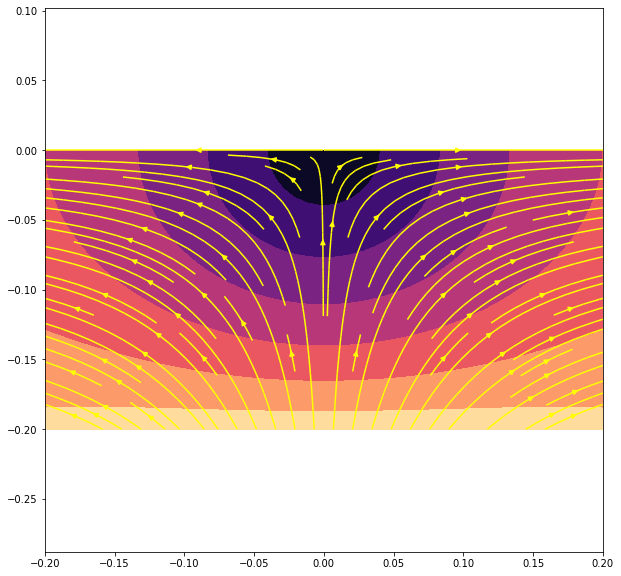

In [93]:
plt.figure(figsize=(10,10))

plt.streamplot(x2d,y2d,E[0],E[1],color="yellow")
plt.contourf(x,y,(E[0]**2+E[1]**2)**.5,cmap="magma")
plt.axis("equal")

In [46]:
@njit
def elecFieldWire(x,y):
    return np.array([x/(x**2+y**2),y/(x**2+y**2)])
@njit
def surfaceSpeed(x):
    return elecFieldWire(x,0.4)+elecFieldWire(x,-.4)
@njit
def update(x,litho):
    dt=1e-3
    dx=x[1]-x[0]
    new_litho=np.zeros_like(litho)
    for i in range(len(x)):
        speed=surfaceSpeed(x[i])[0]
        x_prev=i-speed*dt/dx
        x0=int(x_prev)
        x1=x0+1
        t=x_prev-x0
        new_litho[:,i]=litho[:,x0]*(1-t)+litho[:,x1]*t
        height=litho[0,i]-litho[1,i]
        new_litho[1,i]-=np.exp(-height*5)
    return new_litho

In [51]:
litho=np.array([np.full(300,0),np.full(300,-10)],dtype=float)
x=np.linspace(-1,1,len(litho[0]))
litho[1]+=np.exp(-(x)**2/.05**2)*10


In [32]:
for i in range(2):
    litho=update(x,litho)

(-15.0, 1.0)

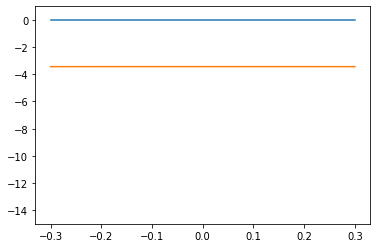

In [33]:
plt.plot(x,litho[0])
plt.plot(x,litho[1])
plt.ylim(-15,1)

<IPython.core.display.Javascript object>


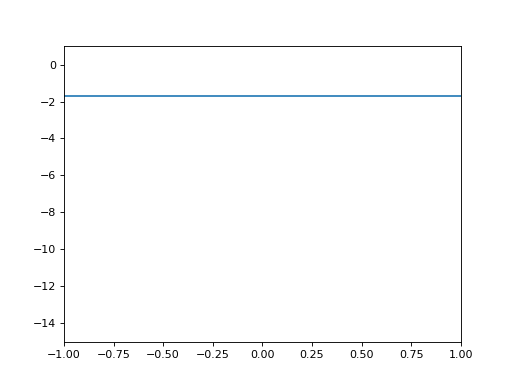

In [52]:

%matplotlib notebook
fig = plt.figure()
line, = plt.plot(x,litho[1]) 
plt.xlim(x[0], x[-1])
plt.ylim(-15,1)


def animate(i): 
    global litho
    litho=update(x,litho)
    line.set_data(x, litho[1])
    return line,
 
ani = animation.FuncAnimation(fig, animate, blit=True, interval=20,)

plt.show()